In [1]:
from allthethings import PyNetwork, PyPipe_ps
from allthethings import PyBC_opt_dh
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
fi =  "indata/3pipesL"         #location of .inp file
fc = "indata/3pipesL"          #location of .config file
mtype = 1                      #model used along network edges. 1 for Preissman Slot. 0 for uniform
V0 =[]
Vf = []
Hbar = []
legs = []
lr = []

In [3]:
for i in range(0,8):
    fii = fi+"%d.inp"%i
    fci = fc+"%d.config"%i
    print fci
    n0 = PyNetwork(fii, fci, mtype)     #a network object
    T = n0.T
    M = n0.M
    dt = T/M
    print "T = %.2f M = %d , L = [%.f, %.f, %.f]"%(T,M, n0.Ls[0], n0.Ls[1], n0.Ls[2])
    V0.append(n0.getTotalVolume())
    n0.runForwardProblem(dt)
    Vf.append(n0.getTotalVolume())
    htmp = [n0.getAveGradH(i) for i in range(n0.M+1)]
    Hbar.append(htmp)
    #Hmax.append(max([n0.q]))
    lr.append(n0.Ls[2]/n0.Ls[1])
    legs.append("L1/L2 = %1.2f"%(n0.Ls[2]/n0.Ls[1]))


indata/3pipesL0.config
T = 25.00 M = 3500 , L = [100, 100, 25]
indata/3pipesL1.config
T = 25.00 M = 3500 , L = [100, 100, 50]
indata/3pipesL2.config
T = 25.00 M = 3500 , L = [100, 100, 75]
indata/3pipesL3.config
T = 25.00 M = 3500 , L = [100, 100, 100]
indata/3pipesL4.config
T = 25.00 M = 3500 , L = [100, 100, 125]
indata/3pipesL5.config
T = 25.00 M = 3500 , L = [100, 100, 150]
indata/3pipesL6.config
T = 25.00 M = 3500 , L = [100, 100, 175]
indata/3pipesL7.config
T = 25.00 M = 3500 , L = [100, 100, 400]


L1/L2  mean (dH/dx)   max(dH/dx)   (V(0)-V(T))/V0
0.25     1.3819       89.9268   
0.50     1.7611       120.3061   
0.75     0.7987       36.7965   
1.00     0.7937       27.4536   
1.25     2.0271       125.0437   
1.50     1.4815       121.7231   
1.75     1.5131       121.8327   
4.00     1.5938       121.8523   


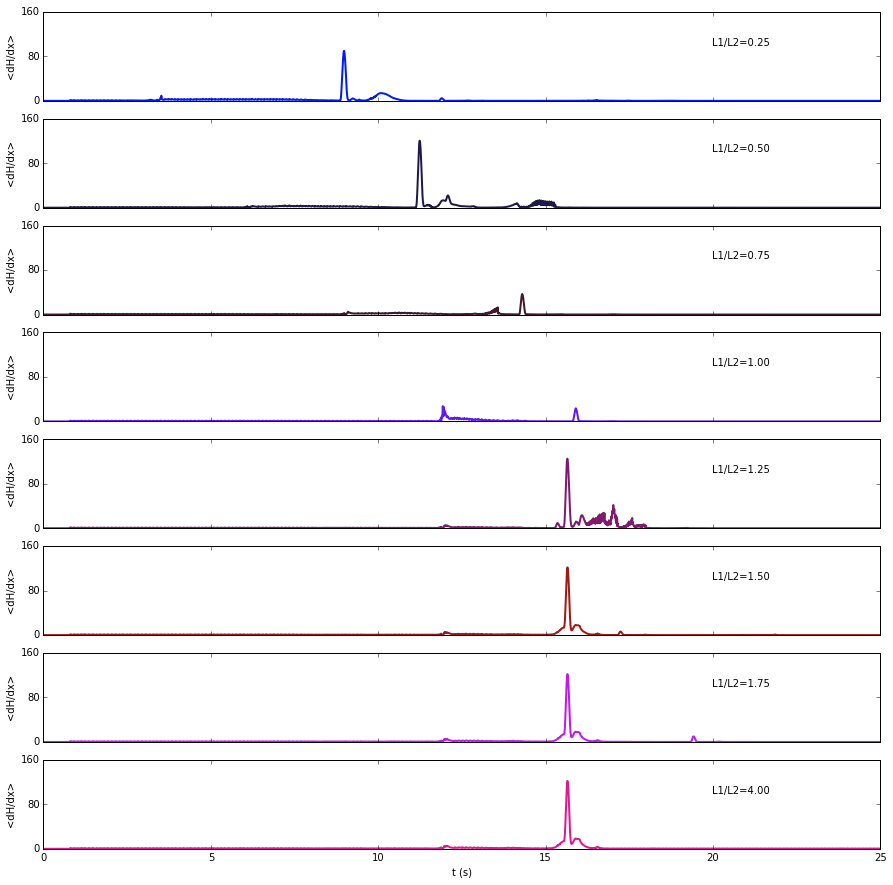

In [4]:
t = linspace(0,T,M+1);
Nh = len(legs)
print "L1/L2  mean (dH/dx)   max(dH/dx)   (V(0)-V(T))/V0"
fig,ax = plt.subplots(nrows = Nh,figsize=(15,15))
for i in range(Nh):
    ax[i].plot(t,Hbar[i],c =(i/8., .1, cos(i)**2),linewidth=2)
    print "%1.2f     %03.4f       %3.4f   "%(lr[i], mean(Hbar[i]), max(Hbar[i]))
    ax[i].text(20,100,"L1/L2=%1.2f"%lr[i])
    ax[i].set_ylim([0,160])
    ax[i].set_yticks([0,80,160])
    if i<Nh-1:
        ax[i].set_xticklabels([])
    ax[i].set_ylabel('<dH/dx>')
ax[i].set_xlabel('t (s)')
savefig("../../dhdxresults.pdf", format='pdf')
plt.show()
#plot(lr, [max(Hbar[i]) for i in range(len(Hbar))],'o')
